## ***Creating a Desnoising Autoencoder to Recover Original Images from Speckle Noise Images***

## Defining Functions and Subroutines:

Importing Libraries:

In [ ]:
pip install visualkeras

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
#import visualkeras

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense
from keras.models import Model
from keras.models import Sequential
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from google.colab import drive

Getting Directory Length Function:

In [2]:
def get_directory_length(directory):

    # List all files and directories in the given directory
    items = os.listdir(directory)

    # Return the length of the list

    return len(items)

Creating Training Data Function:

In [9]:
def CreateTrainingData(directory,output_length):
  os.chdir(directory)

  dir_length = get_directory_length(directory)

  dir_list = os.listdir(directory)

  training_data = np.zeros((output_length, 200, 200, 1))

  datas = 0

  for i in range(dir_length):
    new_directory = directory+"/"+dir_list[i]

    os.chdir(new_directory)

    #new_dir_length = get_directory_length(new_directory)
    new_dir_length = int(get_directory_length(new_directory)/8)

    new_dir_list = os.listdir(new_directory)

    for k in range(new_dir_length):
      image = cv2.imread(new_dir_list[k])
      gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      gray_image = cv2.resize(gray_image, (200, 200))
      gray_image = np.expand_dims(gray_image, axis=-1)

      training_data[datas,:,:,:] = gray_image

      datas += 1

      print(str(datas)+" out of "+str(output_length)+" images evaluated")

  return training_data

Creating Denoising Autoencoder Model Function:

In [4]:
def denoisingAutoencoder(input_shape):
    # Encoding
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoding
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    autoencoder.summary()

    return autoencoder

## Creating Training and Validation Data for Denoising Autoencoder:

Mounting Google Drive:

In [5]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Directories:

In [6]:
# Original Resized:
original_dir = '/content/drive/MyDrive/OCT Resized/train'
original_test_dir = '/content/drive/MyDrive/OCT Resized/test'

# Low Speckle Noise
speckle_low_dir = '/content/drive/MyDrive/OCT Low Speckle/train'
speckle_low_test_dir = '/content/drive/MyDrive/OCT Low Speckle/test'

# Medium Speckle Noise
speckle_mid_dir = '/content/drive/MyDrive/OCT Mid Speckle/train'
speckle_mid_test_dir = '/content/drive/MyDrive/OCT Mid Speckle/test'

# High Speckle Noise
speckle_high_dir = '/content/drive/MyDrive/OCT High Speckle/train'
speckle_high_test_dir = '/content/drive/MyDrive/OCT High Speckle/test'

**Creating Training Data:**

1. Original Resized

In [7]:
resized_x_train = CreateTrainingData(original_dir,5168)

Streaming output truncated to the last 5000 lines.
168 out of 5168 images evaluated
169 out of 5168 images evaluated
170 out of 5168 images evaluated
171 out of 5168 images evaluated
172 out of 5168 images evaluated
173 out of 5168 images evaluated
174 out of 5168 images evaluated
175 out of 5168 images evaluated
176 out of 5168 images evaluated
177 out of 5168 images evaluated
178 out of 5168 images evaluated
179 out of 5168 images evaluated
180 out of 5168 images evaluated
181 out of 5168 images evaluated
182 out of 5168 images evaluated
183 out of 5168 images evaluated
184 out of 5168 images evaluated
185 out of 5168 images evaluated
186 out of 5168 images evaluated
187 out of 5168 images evaluated
188 out of 5168 images evaluated
189 out of 5168 images evaluated
190 out of 5168 images evaluated
191 out of 5168 images evaluated
192 out of 5168 images evaluated
193 out of 5168 images evaluated
194 out of 5168 images evaluated
195 out of 5168 images evaluated
196 out of 5168 images ev

In [10]:
np.save('/content/drive/MyDrive/Reconstructed Images/resized_x_train.npy',resized_x_train)

2. Low Speckle

In [11]:
speckle_low_x_train = CreateTrainingData(speckle_low_dir,5168)

Streaming output truncated to the last 5000 lines.
168 out of 5168 images evaluated
169 out of 5168 images evaluated
170 out of 5168 images evaluated
171 out of 5168 images evaluated
172 out of 5168 images evaluated
173 out of 5168 images evaluated
174 out of 5168 images evaluated
175 out of 5168 images evaluated
176 out of 5168 images evaluated
177 out of 5168 images evaluated
178 out of 5168 images evaluated
179 out of 5168 images evaluated
180 out of 5168 images evaluated
181 out of 5168 images evaluated
182 out of 5168 images evaluated
183 out of 5168 images evaluated
184 out of 5168 images evaluated
185 out of 5168 images evaluated
186 out of 5168 images evaluated
187 out of 5168 images evaluated
188 out of 5168 images evaluated
189 out of 5168 images evaluated
190 out of 5168 images evaluated
191 out of 5168 images evaluated
192 out of 5168 images evaluated
193 out of 5168 images evaluated
194 out of 5168 images evaluated
195 out of 5168 images evaluated
196 out of 5168 images ev

In [12]:
np.save('/content/drive/MyDrive/Reconstructed Images/speckle_low_x_train.npy',speckle_low_x_train)

3. Medium Speckle

In [13]:
speckle_mid_x_train = CreateTrainingData(speckle_mid_dir,5168)

Streaming output truncated to the last 5000 lines.
168 out of 5168 images evaluated
169 out of 5168 images evaluated
170 out of 5168 images evaluated
171 out of 5168 images evaluated
172 out of 5168 images evaluated
173 out of 5168 images evaluated
174 out of 5168 images evaluated
175 out of 5168 images evaluated
176 out of 5168 images evaluated
177 out of 5168 images evaluated
178 out of 5168 images evaluated
179 out of 5168 images evaluated
180 out of 5168 images evaluated
181 out of 5168 images evaluated
182 out of 5168 images evaluated
183 out of 5168 images evaluated
184 out of 5168 images evaluated
185 out of 5168 images evaluated
186 out of 5168 images evaluated
187 out of 5168 images evaluated
188 out of 5168 images evaluated
189 out of 5168 images evaluated
190 out of 5168 images evaluated
191 out of 5168 images evaluated
192 out of 5168 images evaluated
193 out of 5168 images evaluated
194 out of 5168 images evaluated
195 out of 5168 images evaluated
196 out of 5168 images ev

In [14]:
np.save('/content/drive/MyDrive/Reconstructed Images/speckle_mid_x_train.npy',speckle_mid_x_train)

4. High Speckle

In [15]:
speckle_high_x_train = CreateTrainingData(speckle_high_dir,5168)

Streaming output truncated to the last 5000 lines.
168 out of 5168 images evaluated
169 out of 5168 images evaluated
170 out of 5168 images evaluated
171 out of 5168 images evaluated
172 out of 5168 images evaluated
173 out of 5168 images evaluated
174 out of 5168 images evaluated
175 out of 5168 images evaluated
176 out of 5168 images evaluated
177 out of 5168 images evaluated
178 out of 5168 images evaluated
179 out of 5168 images evaluated
180 out of 5168 images evaluated
181 out of 5168 images evaluated
182 out of 5168 images evaluated
183 out of 5168 images evaluated
184 out of 5168 images evaluated
185 out of 5168 images evaluated
186 out of 5168 images evaluated
187 out of 5168 images evaluated
188 out of 5168 images evaluated
189 out of 5168 images evaluated
190 out of 5168 images evaluated
191 out of 5168 images evaluated
192 out of 5168 images evaluated
193 out of 5168 images evaluated
194 out of 5168 images evaluated
195 out of 5168 images evaluated
196 out of 5168 images ev

In [16]:
np.save('/content/drive/MyDrive/Reconstructed Images/speckle_high_x_train.npy',speckle_high_x_train)

**Creating Test Data:**

1. Original Resized

In [ ]:
resized_x_val = CreateTrainingData(original_test_dir,1000)

1 out of 1000 images evaluated
2 out of 1000 images evaluated
3 out of 1000 images evaluated
4 out of 1000 images evaluated
5 out of 1000 images evaluated
6 out of 1000 images evaluated
7 out of 1000 images evaluated
8 out of 1000 images evaluated
9 out of 1000 images evaluated
10 out of 1000 images evaluated
11 out of 1000 images evaluated
12 out of 1000 images evaluated
13 out of 1000 images evaluated
14 out of 1000 images evaluated
15 out of 1000 images evaluated
16 out of 1000 images evaluated
17 out of 1000 images evaluated
18 out of 1000 images evaluated
19 out of 1000 images evaluated
20 out of 1000 images evaluated
21 out of 1000 images evaluated
22 out of 1000 images evaluated
23 out of 1000 images evaluated
24 out of 1000 images evaluated
25 out of 1000 images evaluated
26 out of 1000 images evaluated
27 out of 1000 images evaluated
28 out of 1000 images evaluated
29 out of 1000 images evaluated
30 out of 1000 images evaluated
31 out of 1000 images evaluated
32 out of 1000 im

2. Low Speckle

In [ ]:
speckle_low_x_val = CreateTrainingData(speckle_low_test_dir,1000)

1 out of 1000 images evaluated
2 out of 1000 images evaluated
3 out of 1000 images evaluated
4 out of 1000 images evaluated
5 out of 1000 images evaluated
6 out of 1000 images evaluated
7 out of 1000 images evaluated
8 out of 1000 images evaluated
9 out of 1000 images evaluated
10 out of 1000 images evaluated
11 out of 1000 images evaluated
12 out of 1000 images evaluated
13 out of 1000 images evaluated
14 out of 1000 images evaluated
15 out of 1000 images evaluated
16 out of 1000 images evaluated
17 out of 1000 images evaluated
18 out of 1000 images evaluated
19 out of 1000 images evaluated
20 out of 1000 images evaluated
21 out of 1000 images evaluated
22 out of 1000 images evaluated
23 out of 1000 images evaluated
24 out of 1000 images evaluated
25 out of 1000 images evaluated
26 out of 1000 images evaluated
27 out of 1000 images evaluated
28 out of 1000 images evaluated
29 out of 1000 images evaluated
30 out of 1000 images evaluated
31 out of 1000 images evaluated
32 out of 1000 im

3. Medium Speckle:

In [ ]:
speckle_mid_x_val = CreateTrainingData(speckle_mid_test_dir,1000)

1 out of 1000 images evaluated
2 out of 1000 images evaluated
3 out of 1000 images evaluated
4 out of 1000 images evaluated
5 out of 1000 images evaluated
6 out of 1000 images evaluated
7 out of 1000 images evaluated
8 out of 1000 images evaluated
9 out of 1000 images evaluated
10 out of 1000 images evaluated
11 out of 1000 images evaluated
12 out of 1000 images evaluated
13 out of 1000 images evaluated
14 out of 1000 images evaluated
15 out of 1000 images evaluated
16 out of 1000 images evaluated
17 out of 1000 images evaluated
18 out of 1000 images evaluated
19 out of 1000 images evaluated
20 out of 1000 images evaluated
21 out of 1000 images evaluated
22 out of 1000 images evaluated
23 out of 1000 images evaluated
24 out of 1000 images evaluated
25 out of 1000 images evaluated
26 out of 1000 images evaluated
27 out of 1000 images evaluated
28 out of 1000 images evaluated
29 out of 1000 images evaluated
30 out of 1000 images evaluated
31 out of 1000 images evaluated
32 out of 1000 im

4. High Speckle:

In [ ]:
speckle_high_x_val = CreateTrainingData(speckle_high_test_dir,1000)

1 out of 1000 images evaluated
2 out of 1000 images evaluated
3 out of 1000 images evaluated
4 out of 1000 images evaluated
5 out of 1000 images evaluated
6 out of 1000 images evaluated
7 out of 1000 images evaluated
8 out of 1000 images evaluated
9 out of 1000 images evaluated
10 out of 1000 images evaluated
11 out of 1000 images evaluated
12 out of 1000 images evaluated
13 out of 1000 images evaluated
14 out of 1000 images evaluated
15 out of 1000 images evaluated
16 out of 1000 images evaluated
17 out of 1000 images evaluated
18 out of 1000 images evaluated
19 out of 1000 images evaluated
20 out of 1000 images evaluated
21 out of 1000 images evaluated
22 out of 1000 images evaluated
23 out of 1000 images evaluated
24 out of 1000 images evaluated
25 out of 1000 images evaluated
26 out of 1000 images evaluated
27 out of 1000 images evaluated
28 out of 1000 images evaluated
29 out of 1000 images evaluated
30 out of 1000 images evaluated
31 out of 1000 images evaluated
32 out of 1000 im

## Training Denoising Autoencoder and Exporting Results:

### Low Speckle:

**Training Data:**

Create the Denoising Autoencoder:

In [ ]:
input_shape = (200,200,1)

model = denoisingAutoencoder(input_shape)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        9248  

Visualize the Model:

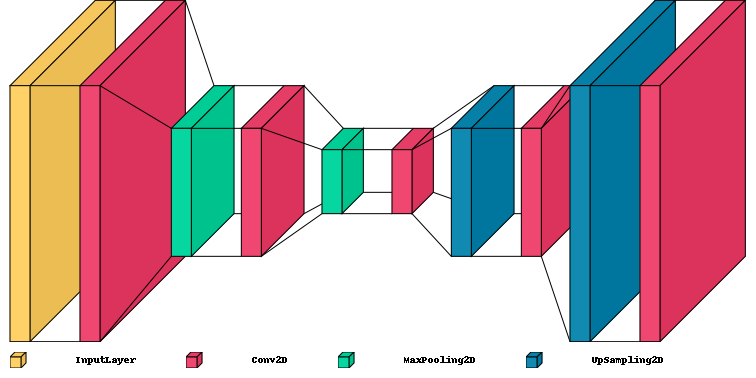

In [ ]:
visualkeras.layered_view(model,legend=True,draw_volume=True,spacing=50,scale_xy=1)

Fit the Model:

In [ ]:
speckle_low_x_train_norm = speckle_low_x_train/255
resized_x_train_norm  = resized_x_train/255

hist = model.fit(speckle_low_x_train_norm,resized_x_train_norm, epochs= 3, batch_size= 32,
                 validation_split = 0.2)

Plot Results (Original Image vs.Noisy Image vs. Recovered Image):

In [ ]:
rand_indx = np.random.randint(0,len(resized_x_train))

og_pic = resized_x_train[rand_indx,:,:,:]

noisy_pic = speckle_low_x_train[rand_indx,:,:,:]

speckle_low_train_out = model.predict(speckle_low_x_train_norm)

reconstructed_pic = speckle_low_train_out[rand_indx,:,:,:]

mse = mean_squared_error(np.squeeze(og_pic/255),np.squeeze(reconstructed_pic))

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(og_pic,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(noisy_pic,cmap='gray')
plt.title('Speckled Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(reconstructed_pic,cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

print("Mean Square Error = "+str(mse))

Saving the Reconstructed Data for VGG-16 Classification:

In [ ]:
np.save('/content/drive/MyDrive/Reconstructed Images/speckle_low_train_out.npy',speckle_low_train_out)

**Test Data:**

Create the Denoising Autoencoder:

In [ ]:
input_shape = (200,200,1)

model = denoisingAutoencoder(input_shape)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 100, 100, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 32)        9248

Fit the Model:

In [ ]:
speckle_low_x_val_norm = speckle_low_x_val/255
resized_x_val_norm  = resized_x_val/255

hist = model.fit(speckle_low_x_val_norm,resized_x_val_norm, epochs= 3, batch_size= 32,
                 validation_split = 0.2)

Epoch 1/3
25/25 [==============================] - 207s 8s/step - loss: 0.0529 - val_loss: 0.0302
Epoch 2/3
25/25 [==============================] - 213s 9s/step - loss: 0.0401 - val_loss: 0.0296
Epoch 3/3
25/25 [==============================] - 219s 9s/step - loss: 0.0386 - val_loss: 0.0295


Plot Results (Original Image vs.Noisy Image vs. Recovered Image):

32/32 [==============================] - 42s 1s/step


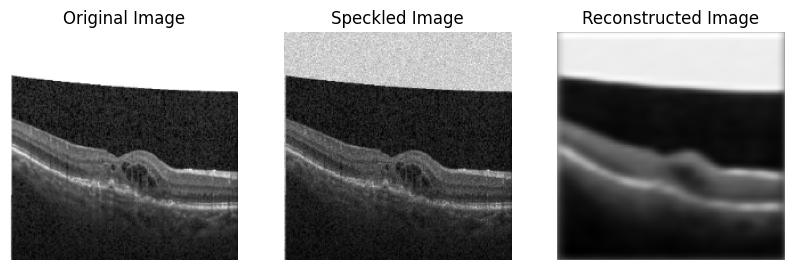

Mean Square Error = 0.020023660335650027


In [ ]:
rand_indx = np.random.randint(0,len(resized_x_val))

og_pic = resized_x_val[rand_indx,:,:,:]

noisy_pic = speckle_low_x_val[rand_indx,:,:,:]

speckle_low_val_out = model.predict(speckle_low_x_val_norm)

reconstructed_pic = speckle_low_val_out[rand_indx,:,:,:]

mse = mean_squared_error(np.squeeze(og_pic/255),np.squeeze(reconstructed_pic))

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(og_pic,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(noisy_pic,cmap='gray')
plt.title('Speckled Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(reconstructed_pic,cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

print("Mean Square Error = "+str(mse))

Saving the Reconstructed Data for VGG-16 Classification:

In [ ]:
np.save('/content/drive/MyDrive/Reconstructed Images/speckle_low_val_out.npy',speckle_low_val_out)

### Medium Speckle:

**Training Data:**

Create the Denoising Autoencoder:

In [ ]:
input_shape = (200,200,1)

model = denoisingAutoencoder(input_shape)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        9248  

Fit the Model:

In [ ]:
speckle_mid_x_train_norm = speckle_mid_x_train/255
resized_x_train_norm  = resized_x_train/255

hist = model.fit(speckle_mid_x_train_norm,resized_x_train_norm, epochs= 3, batch_size= 32,
                 validation_split = 0.2)

Plot Results (Original Image vs.Noisy Image vs. Recovered Image):

In [ ]:
rand_indx = np.random.randint(0,len(resized_x_train))

og_pic = resized_x_train[rand_indx,:,:,:]

noisy_pic = speckle_mid_x_train[rand_indx,:,:,:]

speckle_mid_train_out = model.predict(speckle_mid_x_train_norm)

reconstructed_pic = speckle_mid_train_out[rand_indx,:,:,:]

mse = mean_squared_error(np.squeeze(og_pic/255),np.squeeze(reconstructed_pic))

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(og_pic,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(noisy_pic,cmap='gray')
plt.title('Speckled Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(reconstructed_pic,cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

print("Mean Square Error = "+str(mse))

Saving the Reconstructed Data for VGG-16 Classification:

In [ ]:
np.save('/content/drive/MyDrive/Reconstructed Images/speckle_mid_train_out.npy',speckle_mid_train_out)

**Test Data:**

Create the Denoising Autoencoder:

In [ ]:
input_shape = (200,200,1)

model = denoisingAutoencoder(input_shape)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 100, 100, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 100, 100, 32)      18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 50, 50, 32)        9248

Fit the Model:

In [ ]:
speckle_mid_x_val_norm = speckle_mid_x_val/255
resized_x_val_norm  = resized_x_val/255

hist = model.fit(speckle_mid_x_val_norm,resized_x_val_norm, epochs= 3, batch_size= 32,
                 validation_split = 0.2)

Epoch 1/3
25/25 [==============================] - 225s 9s/step - loss: 0.0758 - val_loss: 0.0141
Epoch 2/3
25/25 [==============================] - 184s 7s/step - loss: 0.0149 - val_loss: 0.0074
Epoch 3/3
25/25 [==============================] - 171s 7s/step - loss: 0.0105 - val_loss: 0.0052


Plot Results (Original Image vs.Noisy Image vs. Recovered Image):

32/32 [==============================] - 43s 1s/step


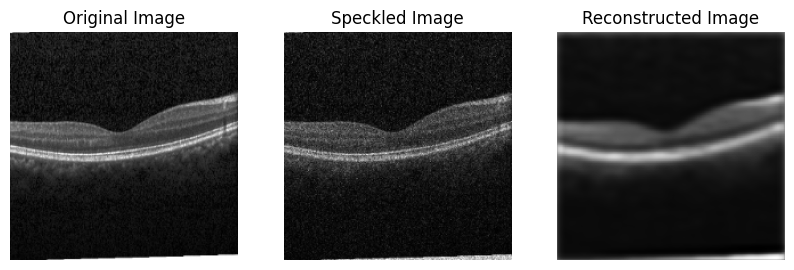

Mean Square Error = 0.00511608952174948


In [ ]:
rand_indx = np.random.randint(0,len(resized_x_val))

og_pic = resized_x_val[rand_indx,:,:,:]

noisy_pic = speckle_mid_x_val[rand_indx,:,:,:]

speckle_mid_val_out = model.predict(speckle_mid_x_val_norm)

reconstructed_pic = speckle_mid_val_out[rand_indx,:,:,:]

mse = mean_squared_error(np.squeeze(og_pic/255),np.squeeze(reconstructed_pic))

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(og_pic,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(noisy_pic,cmap='gray')
plt.title('Speckled Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(reconstructed_pic,cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

print("Mean Square Error = "+str(mse))

Saving the Reconstructed Data for VGG-16 Classification:

In [ ]:
np.save('/content/drive/MyDrive/Reconstructed Images/speckle_mid_val_out.npy',speckle_mid_val_out)

### High Speckle:

**Training Data:**

Create the Denoising Autoencoder:

In [ ]:
input_shape = (200,200,1)

model = denoisingAutoencoder(input_shape)

Fit the Model:

In [ ]:
speckle_high_x_train_norm = speckle_high_x_train/255
resized_x_train_norm  = resized_x_train/255

hist = model.fit(speckle_high_x_train_norm,resized_x_train_norm, epochs= 3, batch_size= 32,
                 validation_split = 0.2)

Plot Results (Original Image vs.Noisy Image vs. Recovered Image):

In [ ]:
rand_indx = np.random.randint(0,len(resized_x_train))

og_pic = resized_x_train[rand_indx,:,:,:]

noisy_pic = speckle_high_x_train[rand_indx,:,:,:]

speckle_high_train_out = model.predict(speckle_high_x_train_norm)

reconstructed_pic = speckle_high_train_out[rand_indx,:,:,:]

mse = mean_squared_error(np.squeeze(og_pic/255),np.squeeze(reconstructed_pic))

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(og_pic,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(noisy_pic,cmap='gray')
plt.title('Speckled Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(reconstructed_pic,cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

print("Mean Square Error = "+str(mse))

Saving the Reconstructed Data for VGG-16 Classification:

In [ ]:
np.save('/content/drive/MyDrive/Reconstructed Images/speckle_high_train_out.npy',speckle_high_train_out)

**Test Data:**

Create the Denoising Autoencoder:

In [ ]:
input_shape = (200,200,1)

model = denoisingAutoencoder(input_shape)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 1)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 200, 200, 64)      640       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 100, 100, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 100, 100, 32)      18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 50, 50, 32)        9248

Fit the Model:

In [ ]:
speckle_high_x_val_norm = speckle_high_x_val/255
resized_x_val_norm  = resized_x_val/255

hist = model.fit(speckle_high_x_val_norm,resized_x_val_norm, epochs= 3, batch_size= 32,
                 validation_split = 0.2)

Epoch 1/3
25/25 [==============================] - 175s 7s/step - loss: 0.0933 - val_loss: 0.0241
Epoch 2/3
25/25 [==============================] - 174s 7s/step - loss: 0.0164 - val_loss: 0.0084
Epoch 3/3
25/25 [==============================] - 172s 7s/step - loss: 0.0081 - val_loss: 0.0062


Plot Results (Original Image vs.Noisy Image vs. Recovered Image):

32/32 [==============================] - 43s 1s/step


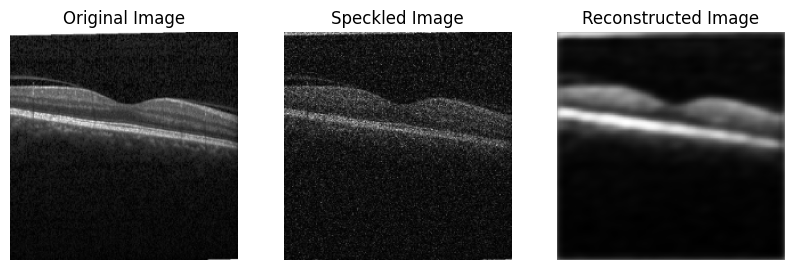

Mean Square Error = 0.006700161342670357


In [ ]:
rand_indx = np.random.randint(0,len(resized_x_val))

og_pic = resized_x_val[rand_indx,:,:,:]

noisy_pic = speckle_high_x_val[rand_indx,:,:,:]

speckle_high_val_out = model.predict(speckle_high_x_val_norm)

reconstructed_pic = speckle_high_val_out[rand_indx,:,:,:]

mse = mean_squared_error(np.squeeze(og_pic/255),np.squeeze(reconstructed_pic))

plt.figure(figsize=(10,10))

plt.subplot(1,3,1)
plt.imshow(og_pic,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(noisy_pic,cmap='gray')
plt.title('Speckled Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(reconstructed_pic,cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

print("Mean Square Error = "+str(mse))

Saving the Reconstructed Data for VGG-16 Classification:

In [ ]:
np.save('/content/drive/MyDrive/Reconstructed Images/speckle_high_val_out.npy',speckle_high_val_out)